# 4장. 신경망 학습

https://github.com/WegraLee/deep-learning-from-scratch

이 코드의 내용은 Deep Learning from Scratch를 참고했음을 밝힙니다.

### 평균 제곱 오차(p112)

![image.png](https://i.imgur.com/2imx4Ia.png)

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 소프트맥스 함수의 출력(확률)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 레이블(원-핫 인코딩)

In [5]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

In [6]:
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 교차 엔트로피 오차(p113)

![image.png](https://i.imgur.com/9JUwq7G.png)

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) # np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문에 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 합니다.

In [10]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 미니배치 학습(p115)

![image.png](https://i.imgur.com/eXuPI0m.png)

In [1]:
import sys, os
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [3]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [4]:
# np.random.choice()로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있습니다.

np.random.choice(60000, 10)

array([34312, 51526, 51296, 49627, 22242, 31382, 31184, 28054, 31480,
        7738])

### (배치용) 교차 엔트로피 오차 구현하기(p118)

In [5]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log*(y+1e-7))/batch_size

In [6]:
# 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌을 때

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수치 미분(p121)

In [7]:
# 나쁜 구현 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h


# 개선 1
# h에 가급적 작은 값을 대입하고 싶었기에(가능하다면 h를 0으로 무한히 가깝게 하고 싶으니) 10e-50이라는 작은 값을 이용했습니다.
# 이 값은 0.00...1 형태에서 0이 50개라는 의미죠.
# 그러나 이 방식은 반올림 오차(rounding error) 문제를 일으킵니다.
# 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 합니다.
# 이 미세한 값 h로 10**-4을 이용해봅시다. 10**-4 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있습니다.

# 개선 2
# 함수 f의 차분(임의 두 점에서의 함수 값들의 차이)과 관련한 것입니다.
# x+h와 x 사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야 합니다.
# '진정한 미분'은 x 위치의 함수의 기울기(이를 접선이라 함)에 해당하지만, 이번 구현에서의 미분은 (x+h)와 x 사이의 기울기에 해당합니다.
# 그래서 진정한 미분(진정한 접선)과 이번 구현의 값은 엄밀히는 일치하지 않습니다.
# 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계입니다.

In [8]:
# 반올림 오차
np.float32(1e-50)

0.0

* 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.<br>
![image.png](https://i.imgur.com/z4hzRS4.png)

위 그림과 같이 수치 미분에는 오차가 포함됩니다. 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 합니다. 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라 합니다(한편, (x+h)와 x의 차분은 전방 차분이라 합니다).

In [9]:
# 이상의 두 개선점을 적용해 수치 미분을 다시 구현

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h))/(2*h)

In [10]:
# 수치 미분의 예

def function_1(x):
    return 0.01*x**2 + 0.1*x

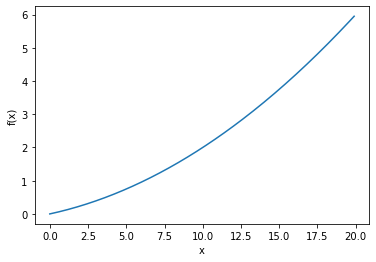

In [14]:
# 이 함수를 그려봅시다.

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [15]:
# x = 5일때와 10일 떄 이 함수의 미분을 계산해봅시다.

numerical_diff(function_1, 5)

0.1999999999990898

In [16]:
numerical_diff(function_1, 10)

0.2999999999986347

### 편미분(p125)

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2
# 또는 return np.sum(x**2)

In [18]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라

def function_tmp1(x0):
    return x0**2 + 4.0**2.0
    # 또는 return np.sum(x**2)

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [19]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기(p127)

In [20]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1- fxh2)/(2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [21]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [22]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [23]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

![image.png](https://i.imgur.com/IZjpn81.png)

위 그림에서 기울기는 가장 낮은 장소를 가리킵니다만, 실제는 반드시 그렇다고는 할 수 없습니다. 사실 기울기는 각 지점에서 낮아지는 방향을 가리킵니다. 더 정확히 말하자면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향입니다.

### 경사법(경사 하강법)(p129)

In [24]:
# 인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻합니다.

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [25]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [26]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [27]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률과 같은 매개변수를 하이퍼파라미터(hyper parameter, 초매개변수)라고 합니다. 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수입니다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수인 것이죠. 일반적으로는 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 합니다.

In [28]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [29]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.70474501  0.91104719  1.18766659]
 [-0.13536328 -0.19119192  0.76806372]]


In [30]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.14467396  0.37455558  1.4038573 ]


In [31]:
np.argmax(p) # 최댓값의 인덱스

2

In [32]:
t = np.array([0,0,1]) # 정답 레이블
net.loss(x, t)

0.36148017547156813

In [33]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.03268505  0.14932834 -0.18201339]
 [ 0.04902758  0.2239925  -0.27302008]]


In [34]:
# 파이썬에서는 간단한 함수라면 람다(lambda) 기법을 쓰면 더 편합니다.
# 가령 lambda를 쓰면 다음과 같이 구현할 수 있습니다.

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

### 학습 알고리즘 구현하기(p136)

전제
* 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행합니다.

1단계 - 미니배치
* 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표입니다.

2단계 - 기울기 산출
* 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.

3단계 - 매개변수 갱신
* 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.

4단계 - 반복
* 1~3단계를 반복합니다.

### 2층 신경망 클래스 구현하기(p137)

In [46]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    # 초기화를 수행한다.
    # 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std=0.01):
        # 가중치 초기화
        self.params = {} # 신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수)
        self.params['W1'] = weight_init_std*\
                            np.random.randn(input_size, hidden_size) # 1번째 층의 가중치
        self.params['b1'] = np.zeros(hidden_size) # 1번째 층의 편향
        self.params['W2'] = weight_init_std*\
                            np.random.randn(hidden_size, output_size) # 2번째 층의 가중치
        self.params['b2'] = np.zeros(output_size) # 2번째 층의 편향
        
    
    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    
    # 손실 함수의 값을 구한다.
    # 인수 x는 이미지 데이터, t는 정답 레이블
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    
    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    
    # 가중치 매개변수의 기울기를 구한다.
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {} # 기울기 보관하는 딕셔너리 변수(numerical_gradient() 메서드의 반환 값)
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 1번째 층의 가중치의 기울기
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 1번째 층의 편향의 기울기
        grads['W2'] = numerical_gradient(loss_W, self.params['W2']) # 2번째 층의 가중치의 기울기
        grads['b2'] = numerical_gradient(loss_W, self.params['b2']) # 2번째 층의 편향의 기울기
        
        return grads

In [47]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [48]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [49]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

KeyboardInterrupt: 

### 미니배치 학습 구현하기(p141)

In [52]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

### 시험 데이터로 평가하기(p143)

In [54]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | '
             + str(train_acc) + ', ' + str(test_acc))

KeyboardInterrupt: 

### 정리(p146)

* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.